<h1>Airline passengers ANN</h1>

In [39]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Sliding Windows Method
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
seed = 1
numpy.random.seed(seed)
tf.random.set_seed(seed)

dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

print(dataset[:5])

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size

train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


[[112.]
 [118.]
 [132.]
 [129.]
 [121.]]


Epoch 1/30
94/94 - 3s - loss: 0.0412
Epoch 2/30
94/94 - 0s - loss: 0.0204
Epoch 3/30
94/94 - 0s - loss: 0.0161
Epoch 4/30
94/94 - 0s - loss: 0.0151
Epoch 5/30
94/94 - 1s - loss: 0.0142
Epoch 6/30
94/94 - 0s - loss: 0.0132
Epoch 7/30
94/94 - 0s - loss: 0.0120
Epoch 8/30
94/94 - 1s - loss: 0.0107
Epoch 9/30
94/94 - 1s - loss: 0.0091
Epoch 10/30
94/94 - 1s - loss: 0.0073
Epoch 11/30
94/94 - 1s - loss: 0.0056
Epoch 12/30
94/94 - 0s - loss: 0.0043
Epoch 13/30
94/94 - 0s - loss: 0.0033
Epoch 14/30
94/94 - 0s - loss: 0.0027
Epoch 15/30
94/94 - 0s - loss: 0.0025
Epoch 16/30
94/94 - 0s - loss: 0.0023
Epoch 17/30
94/94 - 0s - loss: 0.0022
Epoch 18/30
94/94 - 0s - loss: 0.0023
Epoch 19/30
94/94 - 1s - loss: 0.0021
Epoch 20/30
94/94 - 0s - loss: 0.0022
Epoch 21/30
94/94 - 0s - loss: 0.0021
Epoch 22/30
94/94 - 0s - loss: 0.0022
Epoch 23/30
94/94 - 0s - loss: 0.0022
Epoch 24/30
94/94 - 0s - loss: 0.0022
Epoch 25/30
94/94 - 0s - loss: 0.0021
Epoch 26/30
94/94 - 0s - loss: 0.0021
Epoch 27/30
94/94 - 0

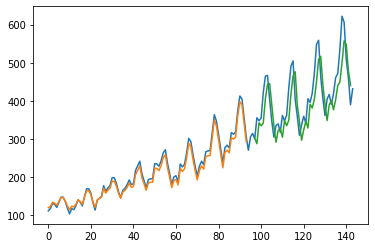

In [38]:
# fix random seed for reproducibility
seed = 1
numpy.random.seed(seed)
tf.random.set_seed(seed)


look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# create and fit Multilayer Perceptron model
model2 = Sequential()
model2.add(Dense(8, input_dim=look_back, activation='relu'))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(trainX, trainY, epochs=25, batch_size=2, verbose=2)

# Estimate model performance
trainScore = model2.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model2.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))


# generate predictions for training
trainPredict = model2.predict(trainX)
testPredict = model2.predict(testX)


# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredict)
plt.plot(testPredictPlot)
plt.show()

<h1>Airline passengers LSTM</h1>

Epoch 1/30
94/94 - 3s - loss: 0.0437
Epoch 2/30
94/94 - 0s - loss: 0.0224
Epoch 3/30
94/94 - 0s - loss: 0.0177
Epoch 4/30
94/94 - 1s - loss: 0.0167
Epoch 5/30
94/94 - 0s - loss: 0.0161
Epoch 6/30
94/94 - 0s - loss: 0.0154
Epoch 7/30
94/94 - 0s - loss: 0.0146
Epoch 8/30
94/94 - 0s - loss: 0.0138
Epoch 9/30
94/94 - 1s - loss: 0.0128
Epoch 10/30
94/94 - 0s - loss: 0.0116
Epoch 11/30
94/94 - 1s - loss: 0.0103
Epoch 12/30
94/94 - 0s - loss: 0.0090
Epoch 13/30
94/94 - 0s - loss: 0.0078
Epoch 14/30
94/94 - 0s - loss: 0.0064
Epoch 15/30
94/94 - 0s - loss: 0.0055
Epoch 16/30
94/94 - 0s - loss: 0.0043
Epoch 17/30
94/94 - 0s - loss: 0.0036
Epoch 18/30
94/94 - 0s - loss: 0.0030
Epoch 19/30
94/94 - 0s - loss: 0.0026
Epoch 20/30
94/94 - 1s - loss: 0.0024
Epoch 21/30
94/94 - 1s - loss: 0.0022
Epoch 22/30
94/94 - 0s - loss: 0.0024
Epoch 23/30
94/94 - 1s - loss: 0.0023
Epoch 24/30
94/94 - 0s - loss: 0.0022
Epoch 25/30
94/94 - 0s - loss: 0.0021
Epoch 26/30
94/94 - 0s - loss: 0.0022
Epoch 27/30
94/94 - 0

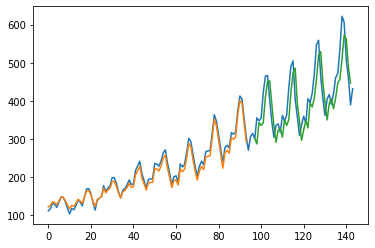

In [45]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


# fix random seed for reproducibility
seed = 1
numpy.random.seed(seed)
tf.random.set_seed(seed)

# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, 1))
testX = numpy.reshape(testX, (testX.shape[0], 1, 1))

# create and fit the LSTM network
model3 = Sequential()
model3.add(LSTM(4, input_shape=(1,look_back), return_sequences=True))
model3.add(LSTM(2, input_shape=(1,look_back)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.fit(trainX, trainY, epochs=30, batch_size=1, verbose=2)

# make predictions
trainPredict = model3.predict(trainX)
testPredict = model3.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredict)
plt.plot(testPredictPlot)
plt.show()

<h1>Stock prices LSTM</h1>

<h3>IBM</h3>

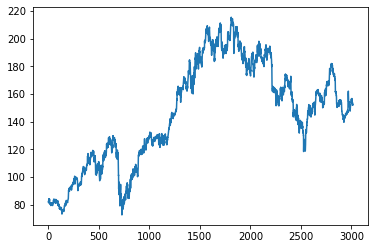

In [66]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(1)
# load the dataset
dataframe = read_csv("IBM_2006-01-01_to_2018-01-01.csv", usecols=[1], engine='python', skipfooter=3).dropna()
dataset = dataframe.values
dataset = dataset.astype('float32')

plt.plot(dataset)
plt.show()

Epoch 1/5
2018/2018 [==============================] - 15s 6ms/step - loss: 0.0400
Epoch 2/5
2018/2018 [==============================] - 12s 6ms/step - loss: 5.8453e-04
Epoch 3/5
2018/2018 [==============================] - 10s 5ms/step - loss: 5.1313e-04
Epoch 4/5
2018/2018 [==============================] - 10s 5ms/step - loss: 4.6775e-04
Epoch 5/5
2018/2018 [==============================] - 10s 5ms/step - loss: 4.1409e-04
Train Score: 2.76 RMSE
Test Score: 3.63 RMSE


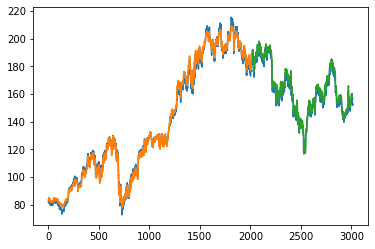

In [67]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model3 = Sequential()
model3.add(LSTM(6, input_shape=(1,look_back), return_sequences=True))
model3.add(LSTM(2, input_shape=(1,look_back)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.fit(trainX, trainY, epochs=5, batch_size=1, verbose=1)

# make predictions
trainPredict = model3.predict(trainX)
testPredict = model3.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)

testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredict)
plt.plot(testPredictPlot)
plt.show()

<h5>Next prediction</h5>

In [68]:
dataset = dataframe.values.astype('float32')
last = dataset[-1]
x_input = numpy.array(last)
maxDataset = max(dataset)
minDataset = min(dataset)
x_input = x_input / (maxDataset - minDataset)
x_input = x_input.reshape((1, 1, 1))
nextPred = model3.predict(x_input)
nextPred = nextPred * (maxDataset - minDataset)
print("Last:", last[0])
print("Next Pred:", nextPred[0][0])
print("Next Pred ratio with last:", nextPred[0][0]/last[0])
# Next next day using one previous example
last = nextPred[0][0]
dataset = dataframe.values.astype('float32')
x_input = numpy.array(last)
x_input = x_input / (maxDataset - minDataset)
x_input = x_input.reshape((1, 1, 1))
nextPred = model3.predict(x_input)
nextPred = nextPred * (maxDataset - minDataset)
print("Next Next Pred:", nextPred[0][0])

Last: 152.51
Next Pred: 141.80676
Next Pred ratio with last: 0.92981946
Next Next Pred: 135.97539


<h3>Amazon</h3>

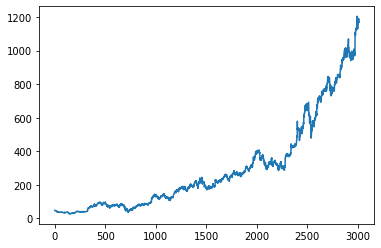

In [57]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(1)
# load the dataset
dataframe = read_csv("AMZN_2006-01-01_to_2018-01-01.csv", usecols=[1], engine='python', skipfooter=3).dropna()
dataset = dataframe.values
dataset = dataset.astype('float32')

plt.plot(dataset)
plt.show()

Epoch 1/5
2018/2018 [==============================] - 15s 6ms/step - loss: 0.0012
Epoch 2/5
2018/2018 [==============================] - 11s 6ms/step - loss: 1.8045e-05
Epoch 3/5
2018/2018 [==============================] - 11s 5ms/step - loss: 1.3444e-05
Epoch 4/5
2018/2018 [==============================] - 12s 6ms/step - loss: 1.3959e-05
Epoch 5/5
2018/2018 [==============================] - 11s 6ms/step - loss: 1.5270e-05
Train Score: 0.00 RMSE
Test Score: 0.04 RMSE


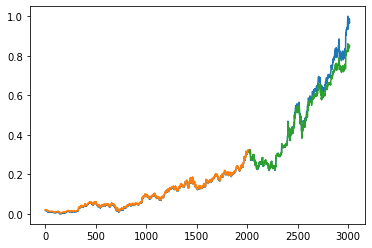

In [64]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model3 = Sequential()
model3.add(LSTM(16, input_shape=(1,look_back), return_sequences=True))
model3.add(LSTM(6, input_shape=(1,look_back)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.fit(trainX, trainY, epochs=5, batch_size=1, verbose=1)

# make predictions
trainPredict = model3.predict(trainX)
testPredict = model3.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)

testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredict)
plt.plot(testPredictPlot)
plt.show()

<h5>Next prediction</h5>

In [65]:
dataset = dataframe.values.astype('float32')
last = dataset[-1]
x_input = numpy.array(last)
maxDataset = max(dataset)
minDataset = min(dataset)
x_input = x_input / (maxDataset - minDataset)
x_input = x_input.reshape((1, 1, 1))
nextPred = model3.predict(x_input)
nextPred = nextPred * (maxDataset - minDataset)
print("Last:", last[0])
print("Next Pred:", nextPred[0][0])
print("Next Pred ratio with last:", nextPred[0][0]/last[0])
# Next next day using one previous example
last = nextPred[0][0]
dataset = dataframe.values.astype('float32')
x_input = numpy.array(last)
x_input = x_input / (maxDataset - minDataset)
x_input = x_input.reshape((1, 1, 1))
nextPred = model3.predict(x_input)
nextPred = nextPred * (maxDataset - minDataset)
print("Next Next Pred:", nextPred[0][0])

Last: 1168.36
Next Pred: 1008.8287
Next Pred ratio with last: 0.8634571
Next Next Pred: 909.5463


It doens't seem to be wise to invest in either of the stocks because you would lose money with both. However, you would lose less money investing in IBM.